# 금융기관의 AI 빅데이터 분석 Final Report
### M81333 이다인, M81354 최윤주
---
첨부 : 제출자료 보충자료(과제코드)

## Import library

In [1]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 경고제거
import warnings
warnings.filterwarnings('ignore')

C:\Users\happy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\happy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\happy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# 모델설명 툴
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# 모델링(분류)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgbm

## Read Data 

In [3]:
data = pd.read_csv('UniversalBank.csv')

In [4]:
data.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0


In [5]:
#총 14개 feature, 5천개 data
data.shape

(5000, 14)

In [6]:
#결측치 없음
data.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# 모델링을 하기 위해 type 확인
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [8]:
#통계수치 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


## 1차 Preprocessing

### ID, ZIP 제거

In [9]:
# 불필요한 변수 drop  : 'ID' and 'ZIP Code'
# 만약 inplace = true 를 쓰면 바로 덮어쓰기가 되긴 하다.(이 부분은 보고서 작성 시 삭제)
data = data.drop(["ID","ZIP Code"],axis=1)

### Experience 이상치 제거

In [10]:
# experience 이상치 확인
data_m =data.loc[data["Experience"]<0, ] 
data_m["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [11]:
#제거해도 될 정도인지, 비율 확인함 -> 1 프로로 제거해도 전체 사이즈에 크게 영향이 없는 수준
is_exp_m =(data["Experience"] < 0) + 0
is_exp_m.value_counts(normalize=True).reset_index()

,index,Experience
0,0,0.9896
1,1,0.0104


In [12]:
## 경험 이상치 제거
data_m_index=data[data["Experience"]<0].index
data=data.drop(data_m_index)

### 중복데이터 제거

In [13]:
# 중복데이터 삭제
data=data.drop_duplicates()

In [14]:
# 이상치 제거 이후 데이터 shape 총 4935
data.shape

(4935, 12)

## EDA & 2차 preprocessiong

In [15]:
# 데이터 확인 시 연속형과 범주형, Target 을 분류하여 부석
x_cate_col = data[["Family","Education","Securities Account","CD Account","Online","CreditCard"]]
y_cate_col = data["Personal Loan"] 

### 범주형 변수 확인

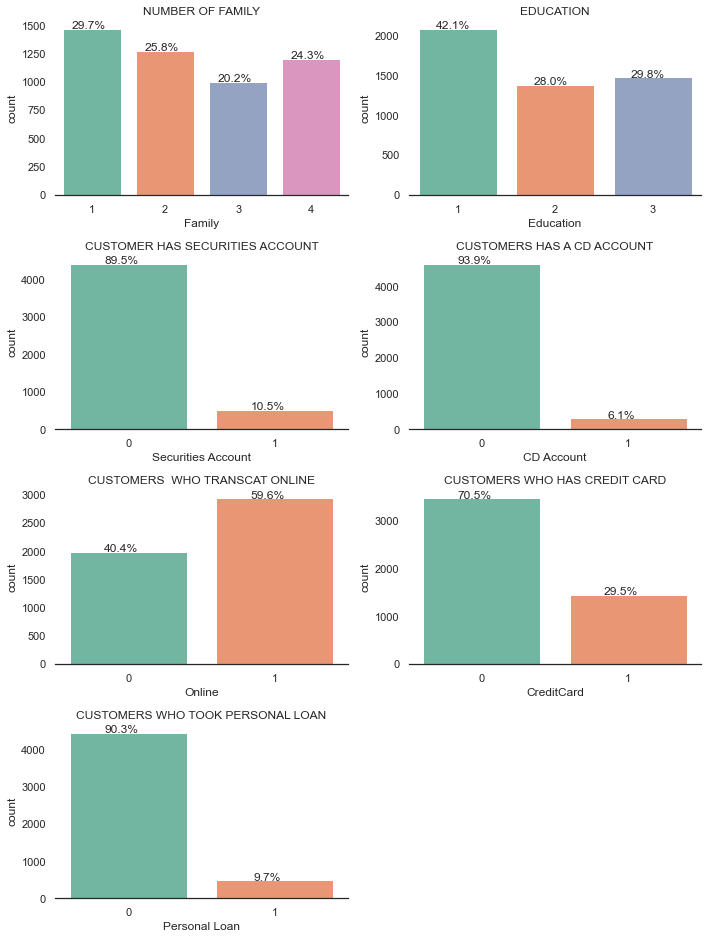

In [16]:
# Making a list of all categorical variables
cate_col = data[["Family","Education","Securities Account","CD Account","Online","CreditCard", "Personal Loan"]]
title=['Number of Family','Education', 'Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat Online', 'Customers who has Credit Card','Customers who took Personal Loan']

plt.figure(figsize=(10,16))

sns.set_theme(style="white") 

for i, variable in enumerate(cate_col):
                     plt.subplot(5,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) 
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

#### Family

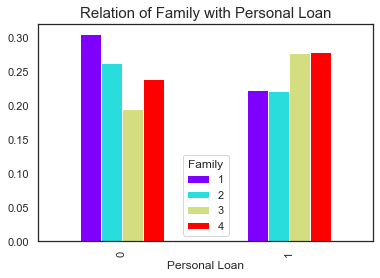

In [17]:
# 가족구성과 개인대출 시각화 
plt.rcParams['figure.figsize'] = (6,4)
dat = pd.crosstab(data['Personal Loan'], data['Family']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of Family with Personal Loan', fontsize = 15, fontweight = 30)
plt.show()

#### Education

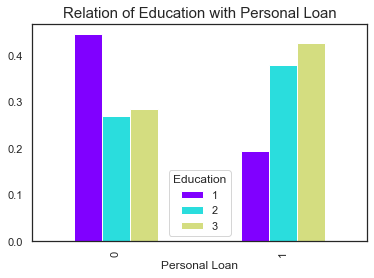

In [18]:
# 교육수준과 개인대출 시각화
plt.rcParams['figure.figsize'] = (6,4)
dat = pd.crosstab(data['Personal Loan'], data['Education']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of Education with Personal Loan', fontsize = 15, fontweight = 30)
plt.show()

In [19]:
# 1,2,3 구간에 대한 대출승인 비율
Edu_Loan = data.groupby("Education")["Personal Loan"].agg(["count", "mean"])
Edu_Loan = Edu_Loan.rename(columns = {"count" : "number of people","mean" : "Edu_Loan mean"})
Edu_Loan

,number of people,Edu_Loan mean
Education,,
1,2079,0.044733
2,1383,0.131598
3,1473,0.139172


#### 기타 2진분류 도넛 차트로 시각화

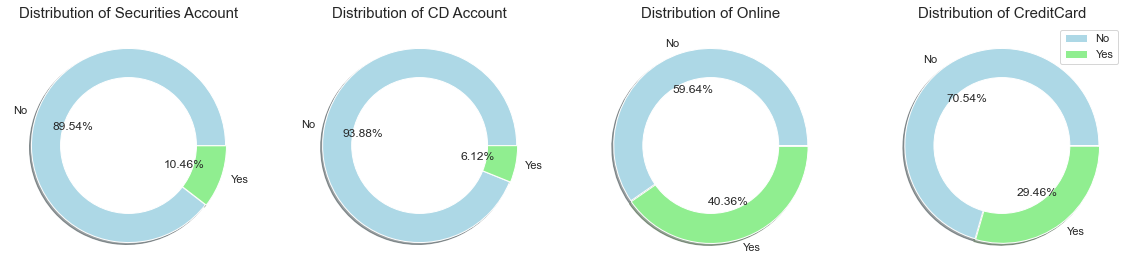

In [20]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,4,i+1)
    size = data[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

### 연속형 변수 확인

In [21]:
x_numeric_col = data[["Age", "Experience", "Income", "CCAvg", "Mortgage"]]

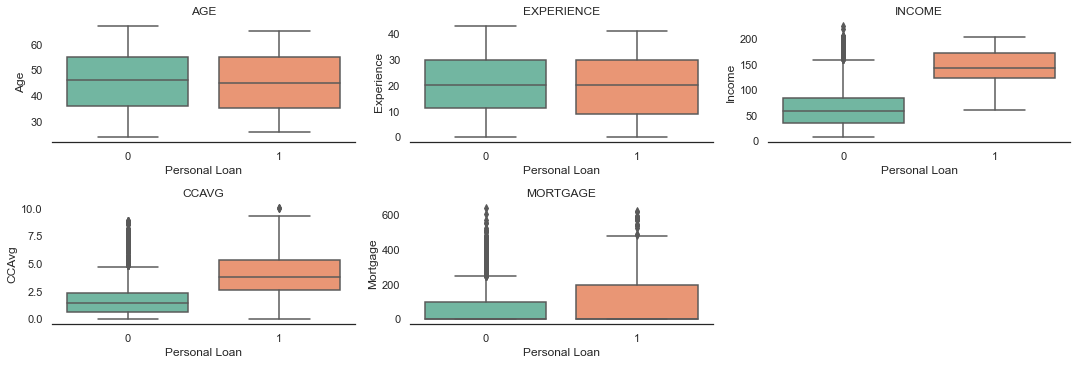

In [22]:
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(x_numeric_col):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Personal Loan',y= data[variable], data=data)     
        sns.despine(top=True,right=True,left=True) 
        plt.tight_layout()
        plt.title(variable.upper())

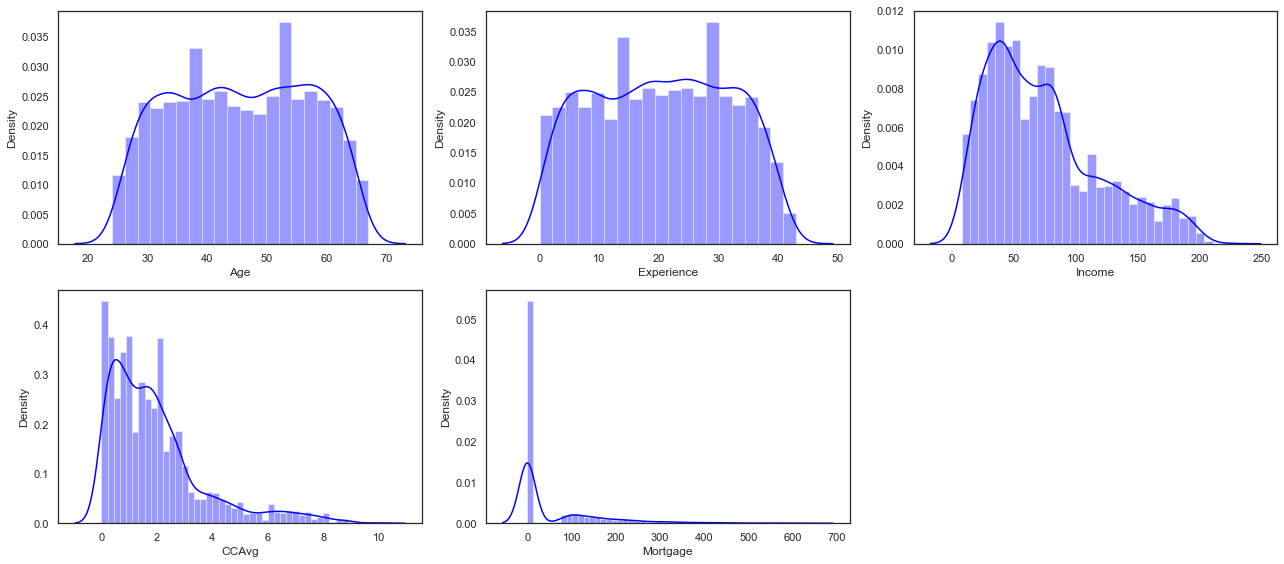

In [23]:
plt.figure(figsize=(18,8))
a = 2  
b = 3  
c = 1  

for i in x_numeric_col.columns:
    plt.subplot(a,b,c)
    sns.distplot(data[i], color = 'Blue')
    c+=1
    
plt.tight_layout()
plt.show()

#### Age

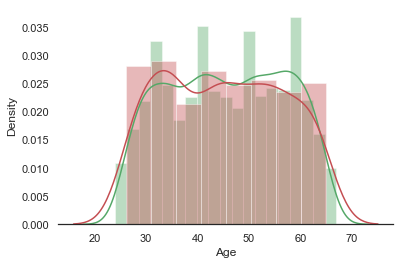

In [24]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.distplot( data[data['Personal Loan'] == 0]['Age'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['Age'], color = 'r')
sns.despine(top=True,right=True,left=True) 

#### Experience

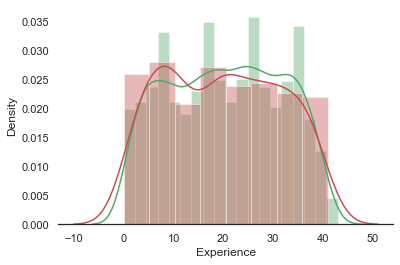

In [25]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.distplot( data[data['Personal Loan'] == 0]['Experience'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['Experience'], color = 'r')
sns.despine(top=True,right=True,left=True)

#### Income

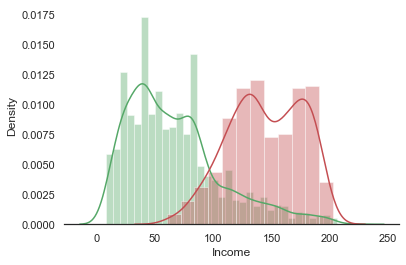

In [26]:
sns.distplot( data[data['Personal Loan'] == 0]['Income'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True)

In [27]:
Loan_Income = data.groupby("Personal Loan")["Income"].agg(["count","mean"])
Loan_Income = Loan_Income.rename(columns = {"count" : "number of people","mean" : "Income mean"})
Loan_Income

,number of people,Income mean
Personal Loan,,
0,4455,66.228507
1,480,144.745833


#### CCAvg

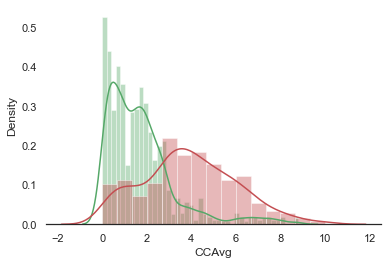

In [28]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True)

In [29]:
Loan_CCAvg = data.groupby("Personal Loan")["CCAvg"].agg(["count","mean"])
Loan_CCAvg = Loan_CCAvg.rename(columns = {"count" : "number of people", "mean" : "Loan_CCAvg"})
Loan_CCAvg

,number of people,Loan_CCAvg
Personal Loan,,
0,4455,1.726738
1,480,3.905354


#### Mortgage

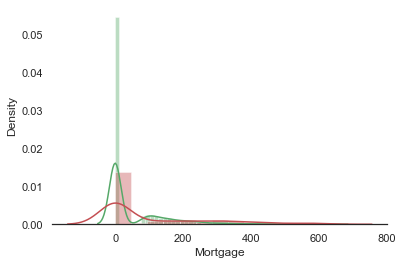

In [30]:
sns.distplot( data[data['Personal Loan'] == 0]['Mortgage'], color = 'g')
sns.distplot( data[data['Personal Loan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True) 

In [31]:
Loan_Mrgg = data.groupby("Personal Loan")["Mortgage"].agg(["count", "mean"])
Loan_Mrgg = Loan_Mrgg.rename(columns = {"count" : "number of people", "mean" : "Loan_Mortgage"})
Loan_Mrgg

,number of people,Loan_Mortgage
Personal Loan,,
0,4455,52.036139
1,480,100.845833


In [32]:
data.loc[data["Mortgage"] > 0, 'Mortgage' ] = "1"

In [33]:
Mrgg_Loan = data.groupby("Mortgage")["Personal Loan"].agg(["count","mean"])
Mrgg_Loan = Mrgg_Loan.rename(columns = {"count" : "number of people","mean" : "Personal Loan mean"})
Mrgg_Loan

,number of people,Personal Loan mean
Mortgage,,
0,3409,0.091522
1,1526,0.110092


### Correlation

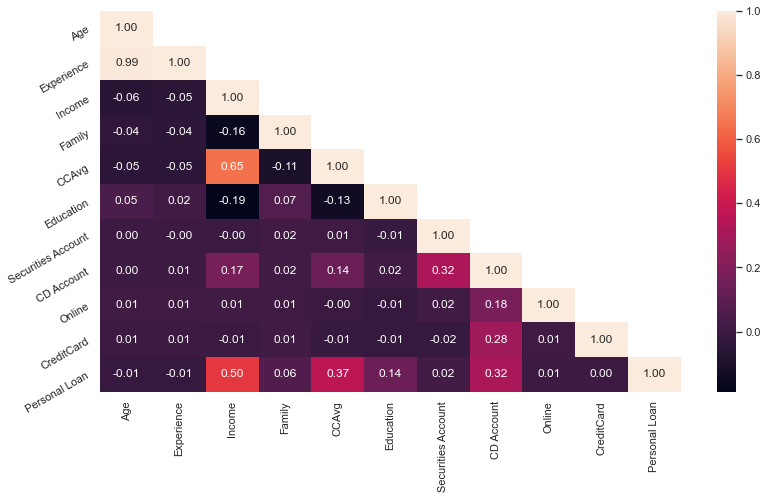

In [34]:
#Crrelation
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [35]:
#상관관계 높은 변수 drop
data = data.drop(["Age"],axis=1)
pre_data=data.copy()

In [36]:
# Correlation imfortance 위한 Randomforest 
# RF 위해서 시행하는 임시 split
X_Rf = pre_data.drop("Personal Loan",axis=1)
y_Rf = pre_data["Personal Loan"]
print("Shape of X:", X_Rf.shape)
print("Shape of y:", y_Rf.shape)

Shape of X: (4935, 10)
Shape of y: (4935,)


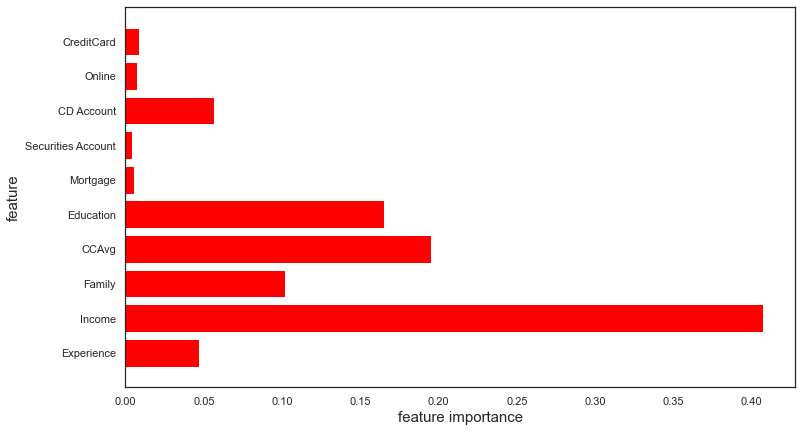

In [37]:
#간단히 중요도만 확인하는 목적으로 사용해보도록 한다.

from sklearn.ensemble import RandomForestClassifier

n_feature = X_Rf.values.shape[1]
index = np.arange(n_feature)

# Random Forest modeling
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_Rf, y_Rf)

# 시각화
plt.figure(figsize=(12,7))
plt.barh(index, forest.feature_importances_, align='center', color = 'red')
plt.yticks(index, list(X_Rf.columns))
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

### K-means Clustering

In [38]:
from sklearn.preprocessing import StandardScaler

sc_data = pre_data.copy()

## Scale the numeric attributes(Experience, Income, CCAvg, Mortgage 에 대해서 )
sc = StandardScaler()
sc_data.iloc[:,:7]= sc.fit_transform(sc_data.iloc[:,:7])

In [39]:
from sklearn.cluster import KMeans

# 3개 집단으로 나눌 때 

model_3 = KMeans(n_clusters = 3, random_state = 12357).fit(sc_data)
df_cluster = pd.DataFrame(model_3.cluster_centers_,columns = sc_data.columns)
df_cluster.round(2)

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0.00,-0.04,0.07,-0.02,-0.00,-0.00,2.93,0.29,0.62,0.28,0.12
1,0.03,-0.46,0.15,-0.40,0.16,-0.00,-0.34,0.02,0.59,0.30,0.02
2,-0.08,1.35,-0.46,1.17,-0.46,0.01,-0.32,0.09,0.60,0.30,0.33


In [40]:
# 4개 집단으로 나눌 때 
model_4 = KMeans(n_clusters = 4, random_state = 12357).fit(sc_data)
df_cluster = pd.DataFrame(model_4.cluster_centers_,columns = sc_data.columns)
df_cluster.round(2)

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0.03,-0.37,0.10,-0.35,0.13,-0.67,-0.34,0.02,0.60,0.29,0.03
1,-0.00,-0.05,0.07,-0.02,-0.00,-0.00,2.93,0.29,0.62,0.27,0.11
2,-0.00,-0.33,0.06,-0.35,0.07,1.49,-0.34,0.03,0.58,0.30,0.05
3,-0.07,1.59,-0.43,1.54,-0.47,-0.10,-0.31,0.10,0.60,0.30,0.37


### 모델링을 위한 전처리

#### 원핫인코딩

In [41]:
pre_data=pre_data.copy()
categorical_cols = ["Family"]
pre_data=pd.get_dummies(pre_data, columns = categorical_cols, drop_first=True)

#### Nomalization

<AxesSubplot:xlabel='Income', ylabel='Density'>

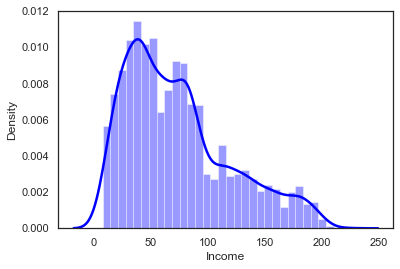

In [42]:
pre_data["Income"] = pre_data["Income"].apply(lambda x : np.log(x))
plt.figure(figsize=(6,4))
sns.distplot(data["Income"], color = 'Blue')

<AxesSubplot:xlabel='Income', ylabel='Density'>

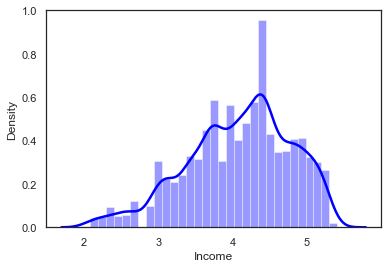

In [43]:
# 위의 그래프 는 원데이터 그리고 아래 그림은 로그변환된 그래프 비교
plt.figure(figsize=(6,4))
sns.distplot(pre_data["Income"], color = 'Blue')

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

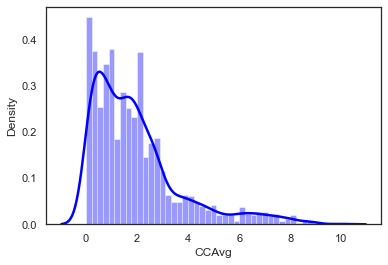

In [44]:
pre_data["CCAvg"] = pre_data["CCAvg"].apply(lambda x : np.log1p(x))
plt.figure(figsize=(6,4))
sns.distplot(data["CCAvg"], color = 'Blue')

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

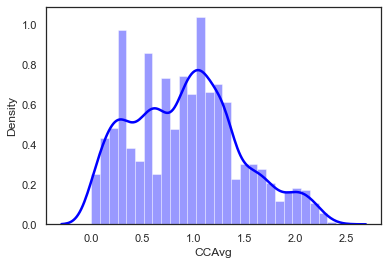

In [45]:
# 위의 그래프 는 원데이터 그리고 아래 그림은 로그변환된 그래프 비교
plt.figure(figsize=(6,4))
sns.distplot(pre_data["CCAvg"], color = 'Blue')

#### X,y 의 train/test split

In [46]:
#  train 의 X, y  값 설정
X = pre_data.drop("Personal Loan",axis=1)
y = pre_data["Personal Loan"]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4935, 12)
Shape of y: (4935,)


In [47]:
# data Split : x_train, x_test, y_train, y_test 으로 나누기(test_size = 0.20) using sklearn 
# 층화추출을 반드시 할 것 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(X, y, stratify=y, train_size=0.70, random_state=8888)

# shapes 확인
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3454, 12)
Shape of x_test : (1481, 12)
Shape of y_train : (3454,)
Shape of y_test : (1481,)


#### Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

## Scale the numeric attributes(Experience, Income, CCAvg, Mortgage 에 대해서 )
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,:3])

x_train.iloc[:,:3] = scaler.transform(x_train.iloc[:,:3])
x_test.iloc[:,:3] = scaler.transform(x_test.iloc[:,:3])

#### 종속변수 불균형 처리하지 않음

In [49]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 7777)

model1 = RandomForestClassifier()
model2 = ExtraTreesClassifier()
model3 = AdaBoostClassifier()
model4 = GradientBoostingClassifier()


acc = []
recall = []
precision = []
f1 = []

for model in [model1, model2, model3, model4]:
    acc.append(np.mean(cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')))
    recall.append(np.mean(cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'recall')))
    precision.append(np.mean(cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'precision')))
    f1.append(cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'f1').mean())
results = pd.DataFrame(data = np.array([acc, recall, precision, f1]), columns= ['acc', 'recall', 'precision', 'f1'])
results.index = ['RandomForestClassifier', 'ExtraTreesClassifie', 'AdaBoostClassifier', 'GradientBoostingClassifie']
results

,acc,recall,precision,f1
RandomForestClassifier,0.984366,0.980312,0.964680,0.985813
ExtraTreesClassifie,0.874612,0.799517,0.754163,0.888410
AdaBoostClassifier,0.967479,0.975954,0.856154,0.963541
GradientBoostingClassifie,0.920954,0.894155,0.800654,0.923892


#### RandomOverSamling 적용하여 종속변수 불균형 처리

In [50]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=7777).fit_resample(x_train, y_train)
acc = []
recall = []
precision = []
f1 = []

for model in [model1, model2, model3, model4]:
    acc.append(np.mean(cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring = 'accuracy')))
    recall.append(np.mean(cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring = 'recall')))
    precision.append(np.mean(cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring = 'precision')))
    f1.append(cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring = 'f1').mean())
results = pd.DataFrame(data = np.array([acc, recall, precision, f1]), columns= ['acc', 'recall', 'precision', 'f1'])
results.index = ['RandomForestClassifier', 'ExtraTreesClassifie', 'AdaBoostClassifier', 'GradientBoostingClassifie']
results

,acc,recall,precision,f1
RandomForestClassifier,0.995991,0.998557,0.941308,0.987012
ExtraTreesClassifie,1.000000,1.000000,0.958777,0.997760
AdaBoostClassifier,0.992053,0.996476,0.926580,0.976748
GradientBoostingClassifie,0.996172,0.998564,0.942303,0.987132


In [51]:
#randomoversamplers 활용 결정
X = X_resampled
y = y_resampled

#  Modeling

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

LR = LogisticRegression()
LR.fit(X , y)
y_pred_LR = LR.predict(x_test)
print(confusion_matrix(y_test, y_pred_LR))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:, 1])
LR_auc=auc(fpr, tpr).round(2)
result_LR = pd.DataFrame([accuracy_score(y_test, y_pred_LR),
                        precision_score(y_test, y_pred_LR),
                        recall_score(y_test, y_pred_LR),
                        f1_score(y_test, y_pred_LR),
                        LR_auc])
result_LR.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_LR.columns = ['results']
result_LR

[[1205  132]
 [  13  131]]


,results
acc,0.902093
precision,0.498099
recall,0.909722
f1_score,0.643735
auc,0.970000


In [53]:
# nooversampling
LR = LogisticRegression()
LR.fit(x_train , y_train)
y_pred_LR1 = LR.predict(x_test)
print(confusion_matrix(y_test, y_pred_LR1))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:, 1])
LR1_auc=auc(fpr, tpr).round(2)
result_LR1 = pd.DataFrame([accuracy_score(y_test, y_pred_LR1),
                        precision_score(y_test, y_pred_LR1),
                        recall_score(y_test, y_pred_LR1),
                        f1_score(y_test, y_pred_LR1),
                        LR1_auc])
result_LR1.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_LR1.columns = ['results']
result_LR1

[[1320   17]
 [  39  105]]


,results
acc,0.962188
precision,0.860656
recall,0.729167
f1_score,0.789474
auc,0.970000


## KNN Classifier

In [54]:
knn_classifier = KNeighborsClassifier(algorithm='brute',weights='distance')
params = {'n_neighbors':[1,11,25],'metric':["euclidean",'cityblock']}
grid = GridSearchCV(knn_classifier,param_grid=params,scoring='accuracy',cv=10)

In [55]:
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)

0.9974335823352678
{'metric': 'cityblock', 'n_neighbors': 1}


In [56]:
best_knn = grid.best_estimator_

y_pred_knn = best_knn.predict(x_test) 
print(confusion_matrix(y_test, y_pred_knn))
fpr, tpr, thresholds = roc_curve(y_test, best_knn.predict_proba(x_test)[:, 1])
best_knn_auc=auc(fpr, tpr).round(2)
result_knn = pd.DataFrame([accuracy_score(y_test, y_pred_knn),
                        precision_score(y_test, y_pred_knn),
                        recall_score(y_test, y_pred_knn),
                        f1_score(y_test, y_pred_knn),
                        best_knn_auc])
result_knn.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_knn.columns = ['results']
result_knn

[[1328    9]
 [  36  108]]


,results
acc,0.969615
precision,0.923077
recall,0.750000
f1_score,0.827586
auc,0.870000


## SVM

In [57]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X,y)
y_pred_svc = svc.predict(x_test)
print(confusion_matrix(y_test, y_pred_svc))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:, 1])
svc_auc=auc(fpr, tpr).round(2)
result_svm = pd.DataFrame([accuracy_score(y_test, y_pred_svc),
                        precision_score(y_test, y_pred_svc),
                        recall_score(y_test, y_pred_svc),
                        f1_score(y_test, y_pred_svc),
                        svc_auc])
result_svm.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_svm.columns = ['results']
result_svm

[[1297   40]
 [   6  138]]


,results
acc,0.968940
precision,0.775281
recall,0.958333
f1_score,0.857143
auc,0.990000


## AdaBoost Classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
# Create adaboost-decision tree classifer object
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)

In [60]:
# Train model
%time ada.fit(X, y)

Wall time: 8.34 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=600)

In [61]:
# Predict on Train 
y_train_pred_ada = ada.predict(X)
# Predict on Test 
y_test_pred_ada = ada.predict(x_test)

In [62]:
print(accuracy_score(y, y_train_pred_ada))
print(accuracy_score(y_test,y_test_pred_ada))

1.0
0.9844699527346388


In [63]:
print(confusion_matrix(y_test, y_test_pred_ada))
fpr, tpr, thresholds = roc_curve(y_test, ada.predict_proba(x_test)[:, 1])
ada_auc=auc(fpr, tpr).round(2)
result_ada = pd.DataFrame([accuracy_score(y_test, y_test_pred_ada),
                        precision_score(y_test, y_test_pred_ada),
                        recall_score(y_test, y_test_pred_ada),
                        f1_score(y_test, y_test_pred_ada),
                        ada_auc])
result_ada.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_ada.columns = ['results']
result_ada

[[1326   11]
 [  12  132]]


,results
acc,0.984470
precision,0.923077
recall,0.916667
f1_score,0.919861
auc,1.000000


## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

%time GBM.fit(X, y)

Wall time: 338 ms


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [65]:
y_train_pred_GBM = GBM.predict(X)
y_test_pred_GMB = GBM.predict(x_test)

print(accuracy_score(y, y_train_pred_GBM))
print(accuracy_score(y_test, y_test_pred_GMB))

0.9951892238614497
0.9824442943956786


In [66]:
print(confusion_matrix(y_test, y_test_pred_GMB))
fpr, tpr, thresholds = roc_curve(y_test, GBM.predict_proba(x_test)[:, 1])
GBM_auc=auc(fpr, tpr).round(2)
result_GBM = pd.DataFrame([accuracy_score(y_test, y_test_pred_GMB),
                        precision_score(y_test, y_test_pred_GMB),
                        recall_score(y_test, y_test_pred_GMB),
                        f1_score(y_test, y_test_pred_GMB),
                        GBM_auc])
result_GBM.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_GBM.columns = ['results']
result_GBM

[[1315   22]
 [   4  140]]


,results
acc,0.982444
precision,0.864198
recall,0.972222
f1_score,0.915033
auc,1.000000


## Cat Boost

In [67]:
#importing library and building model
from catboost import CatBoostClassifier
catmodel=CatBoostClassifier(iterations=50, depth=12, learning_rate=0.1,)
catmodel.fit(X,y,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6201045	total: 210ms	remaining: 10.3s
1:	learn: 0.5602903	total: 262ms	remaining: 6.29s
2:	learn: 0.5073153	total: 286ms	remaining: 4.47s
3:	learn: 0.4544687	total: 289ms	remaining: 3.33s
4:	learn: 0.4109922	total: 292ms	remaining: 2.63s
5:	learn: 0.3804633	total: 361ms	remaining: 2.64s
6:	learn: 0.3509765	total: 422ms	remaining: 2.59s
7:	learn: 0.3234105	total: 481ms	remaining: 2.53s
8:	learn: 0.3011880	total: 542ms	remaining: 2.47s
9:	learn: 0.2809131	total: 610ms	remaining: 2.44s
10:	learn: 0.2623447	total: 675ms	remaining: 2.39s
11:	learn: 0.2462702	total: 742ms	remaining: 2.35s
12:	learn: 0.2304795	total: 806ms	remaining: 2.29s
13:	learn: 0.2172095	total: 870ms	remaining: 2.24s
14:	learn: 0.2018561	total: 922ms	remaining: 2.15s
15:	learn: 0.1918902	total: 965ms	remaining: 2.05s
16:	learn: 0.1804093	total: 1s	remaining: 1.94s
17:	learn: 0.1694837	total: 1.04s	remaining: 1.85s
18:	learn: 0.1610749	total: 1.07s	remaining: 1.75s
19:	learn: 0.1537523	total: 1.13s	remaining:

In [68]:
cat_train_pred = catmodel.predict(X)
cat_test_pred = catmodel.predict(x_test)

print(accuracy_score(y, cat_train_pred))
print(accuracy_score(y_test, cat_test_pred))

0.9959910198845414
0.9831195138419987


In [69]:
print(confusion_matrix(y_test, cat_test_pred))
fpr, tpr, thresholds = roc_curve(y_test, catmodel.predict_proba(x_test)[:, 1])
cat_auc=auc(fpr, tpr).round(2)

result_cat = pd.DataFrame([accuracy_score(y_test, cat_test_pred),
                        precision_score(y_test, cat_test_pred),
                        recall_score(y_test, cat_test_pred),
                        f1_score(y_test, cat_test_pred),
                        cat_auc])
result_cat.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_cat.columns = ['results']
result_cat

[[1317   20]
 [   5  139]]


,results
acc,0.983120
precision,0.874214
recall,0.965278
f1_score,0.917492
auc,1.000000


## Random Forest - Oversampling

### GridSearch 활용
최적의 파라미터 찾기

In [70]:
#performance reporting function

from sklearn.model_selection import GridSearchCV 

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(classifier.best_score_),
                                         str(classifier.cv_results_['std_test_score'][classifier.best_index_])))
    print('Best Parameters: ' + str(classifier.best_params_))

In [71]:
rf = RandomForestClassifier(random_state = 7777)

param_grid =  {'n_estimators': [110],
                'bootstrap': [True,False], #bagging (T) vs. pasting (F)
                 'max_depth': [14],
                'max_features': ['auto','sqrt'],
                 'min_samples_split': np.arange(2,10,2)
              }

clf_rf_rnd = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_resampled,y_resampled)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.9977551251208027 +/- 0.0007850932870098631
Best Parameters: {'bootstrap': False, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 110}


### Best_Modeling- RandomForest
위에서 찾은 파라미터 활용하여 RandomForest 모델링 설계

In [72]:
rf = RandomForestClassifier(random_state = 7777, bootstrap= False, max_features= 'auto', 
                            max_depth=14, min_samples_split=2, n_estimators= 110)
rf.fit(X,y)
y_pred_rf = rf.predict(x_test)

print('RandomForestClassifier test accuracy: {}'.format(accuracy_score(y_test, y_pred_rf)))

RandomForestClassifier test accuracy: 0.986495611073599


위의 결과에 따라 random Forest 모델의 테스트 데이터의 정확도는 98% 임.
Random Forest importance 확인

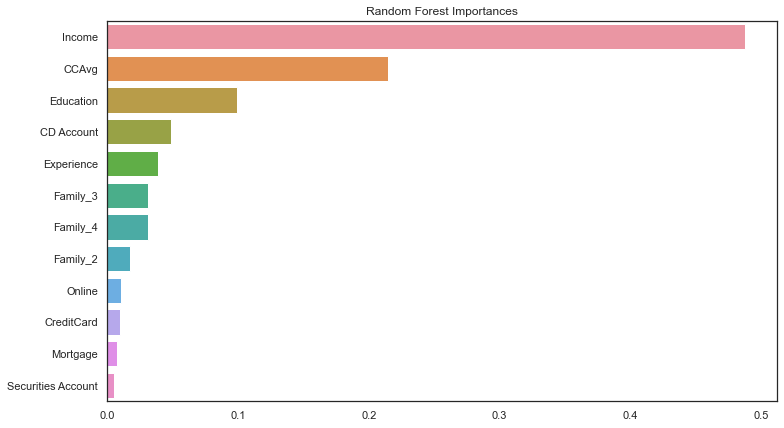

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,7))
rf_importances_values = rf.feature_importances_
rf_importances = pd.Series(rf_importances_values, index=x_train.columns)
rd_top = rf_importances.sort_values(ascending=False)
plt.title("Random Forest Importances")

sns.barplot(x=rd_top, y=rd_top.index)
plt.show()

### Confusion Matrix(prdict 값)

In [74]:
# classification_report(y_test, y_pred_rf, target_names=['거절', '승인'])

In [75]:
print(confusion_matrix(y_test, y_pred_rf))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
rf_auc=auc(fpr, tpr).round(2)

result_rf = pd.DataFrame([accuracy_score(y_test, y_pred_rf),
                        precision_score(y_test, y_pred_rf),
                        recall_score(y_test, y_pred_rf),
                        f1_score(y_test, y_pred_rf),
                        rf_auc])
result_rf.index = ['acc', 'precision', 'recall', 'f1_score', 'auc']
result_rf.columns = ['results']
result_rf

[[1333    4]
 [  16  128]]


,results
acc,0.986496
precision,0.969697
recall,0.888889
f1_score,0.927536
auc,1.000000


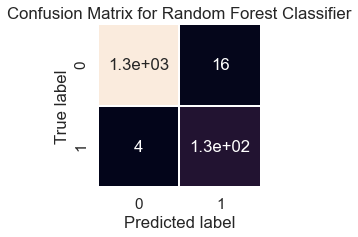

In [76]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(4,3))
sns.set(font_scale=1.4)

matrix_rf = confusion_matrix(y_test.values.reshape(-1,), y_pred_rf)
sns.heatmap(matrix_rf.T, square=True, annot=True,cbar=False, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### ROC_curve

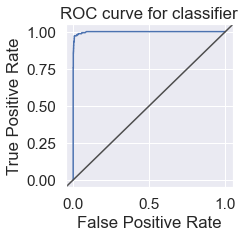

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")

plt.rcParams['figure.figsize'] = (2, 5)
plt.title('ROC curve for classifier', fontweight = 20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Result : Model Comparison

In [78]:
# 모델 결과 정리
model_result =[]
model_result.append(result_LR)
model_result.append(result_knn)
model_result.append(result_svm)
model_result.append(result_ada)
model_result.append(result_GBM)
model_result.append(result_cat)
model_result.append(result_rf)

In [79]:
final_results = pd.concat([model_result[0], 
           model_result[1],
           model_result[2],
           model_result[3],
           model_result[4],
           model_result[5],
           model_result[6]], axis = 1)

In [80]:
final_results.columns = ['LogisticRegression','KNN', 'SVM', 'AdaBoostClassifier','GradientBoostingClassifier' , 'CatBoostClassifier', 'RandomForest']

In [81]:
final_results

,LogisticRegression,KNN,SVM,AdaBoostClassifier,GradientBoostingClassifier,CatBoostClassifier,RandomForest
acc,0.902093,0.969615,0.968940,0.984470,0.982444,0.983120,0.986496
precision,0.498099,0.923077,0.775281,0.923077,0.864198,0.874214,0.969697
recall,0.909722,0.750000,0.958333,0.916667,0.972222,0.965278,0.888889
f1_score,0.643735,0.827586,0.857143,0.919861,0.915033,0.917492,0.927536
auc,0.970000,0.870000,0.990000,1.000000,1.000000,1.000000,1.000000


# Model Explanation

## Eli5 Values

In [82]:
import eli5 
from eli5.sklearn import PermutationImportance

#랜덤포레스트 기준
perm_rf = PermutationImportance(rf, random_state = 7777).fit(X, y)
eli5.show_weights(perm_rf, feature_names = x_test.columns.tolist())

Weight,Feature
0.3840 ± 0.0110,Income
0.1155 ± 0.0054,Education
0.0534 ± 0.0016,CCAvg
0.0489 ± 0.0036,Family_3
0.0418 ± 0.0049,Family_4
0.0163 ± 0.0012,CD Account
0.0088 ± 0.0013,Experience
0.0085 ± 0.0011,Family_2
0.0025 ± 0.0007,CreditCard
0.0020 ± 0.0005,Online
